### TESTING

In [6]:
# To check if DataFrame is created properly
print("DataFrame columns:", df.columns)

# To check if the XML root has the expected child 'SignalGroup'
print("XML Root children:", [child.tag for child in root])

# To check if 'SignalGroup' has children 'Artefact'
signal_group = root.find('SignalGroup')
if signal_group:
    print("SignalGroup children:", [child.tag for child in signal_group])


DataFrame columns: Index([], dtype='object')
XML Root children: ['SignalGroup', 'SignalGroup', 'Info']
SignalGroup children: ['Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact', 'Artefact'

In [10]:
from datetime import datetime, timedelta
import pandas as pd

# Initialize the DataFrame
start_time = datetime.strptime("15:49:27.730", "%H:%M:%S.%f")
end_time = datetime.strptime("14:04:47.730", "%H:%M:%S.%f") + timedelta(days=1)  # Next day

time_list = []

while start_time <= end_time:
    time_list.append({
        'StartTime': start_time.time().strftime("%H:%M:%S.%f")[:-3],
        'EndTime': (start_time + timedelta(seconds=10)).time().strftime("%H:%M:%S.%f")[:-3],
        'annotation': 0
    })

    start_time += timedelta(seconds=10)

df = pd.DataFrame(time_list)

# Debug line to check DataFrame after creation
print("DataFrame after creation:", df)


DataFrame after creation:          StartTime       EndTime  annotation
0     15:49:27.730  15:49:37.730           0
1     15:49:37.730  15:49:47.730           0
2     15:49:47.730  15:49:57.730           0
3     15:49:57.730  15:50:07.730           0
4     15:50:07.730  15:50:17.730           0
...            ...           ...         ...
8008  14:04:07.730  14:04:17.730           0
8009  14:04:17.730  14:04:27.730           0
8010  14:04:27.730  14:04:37.730           0
8011  14:04:37.730  14:04:47.730           0
8012  14:04:47.730  14:04:57.730           0

[8013 rows x 3 columns]


In [22]:
from datetime import datetime, timedelta
import xml.etree.ElementTree as ET
import pandas as pd

# Load the XML
tree = ET.parse('TBI_003.artf')
root = tree.getroot()

# Initialize the DataFrame
start_time = datetime.strptime("15:49:27.730", "%H:%M:%S.%f")
end_time = datetime.strptime("14:04:47.730", "%H:%M:%S.%f") + timedelta(days=1)  # Next day

time_list = []

# Populate DataFrame
while start_time <= end_time:
    time_list.append({
        'StartTime': start_time.time().strftime("%H:%M:%S.%f")[:-3],
        'EndTime': (start_time + timedelta(seconds=10)).time().strftime("%H:%M:%S.%f")[:-3],
        'annotation': 0
    })

    start_time += timedelta(seconds=10)

df = pd.DataFrame(time_list)

# Populate annotation
for signal_group in root.findall('SignalGroup'):
    if signal_group.attrib['Name'] == "icp":
        for artefact in signal_group.findall('Artefact'):
            start_time_xml = artefact.attrib['StartTime'].split(" ")[1]
            end_time_xml = artefact.attrib['EndTime'].split(" ")[1]
            
            mask = (df['StartTime'] == start_time_xml) & (df['EndTime'] == end_time_xml)
            df.loc[mask, 'annotation'] = 1

df = df[0:8012]
print(df)


         StartTime       EndTime  annotation
0     15:49:27.730  15:49:37.730           0
1     15:49:37.730  15:49:47.730           0
2     15:49:47.730  15:49:57.730           0
3     15:49:57.730  15:50:07.730           0
4     15:50:07.730  15:50:17.730           0
...            ...           ...         ...
8007  14:03:57.730  14:04:07.730           1
8008  14:04:07.730  14:04:17.730           1
8009  14:04:17.730  14:04:27.730           1
8010  14:04:27.730  14:04:37.730           1
8011  14:04:37.730  14:04:47.730           1

[8012 rows x 3 columns]


In [2]:
from datetime import datetime, timedelta
import xml.etree.ElementTree as ET
import pandas as pd

# Load the XML
tree = ET.parse('TBI_003.artf')
root = tree.getroot()

# Initialize the DataFrame
start_time = datetime.strptime("15:49:27.730", "%H:%M:%S.%f")
#
end_time = datetime.strptime("14:04:47.730", "%H:%M:%S.%f") + timedelta(days=1)  # Next day

time_list = []

# Populate DataFrame
while start_time <= end_time:
    time_list.append({
        'StartTime': start_time.time().strftime("%H:%M:%S.%f")[:-3],
        'EndTime': (start_time + timedelta(seconds=10)).time().strftime("%H:%M:%S.%f")[:-3],
        'icp_annotation': 0,
        'art_annotation': 0
    })

    start_time += timedelta(seconds=10)

df = pd.DataFrame(time_list)

# Populate annotation
for signal_group in root.findall('SignalGroup'):
    group_name = signal_group.attrib['Name']
    
    if group_name in ['icp', 'art']:
        for artefact in signal_group.findall('Artefact'):
            start_time_xml = artefact.attrib['StartTime'].split(" ")[1]
            end_time_xml = artefact.attrib['EndTime'].split(" ")[1]

            mask = (df['StartTime'] == start_time_xml) & (df['EndTime'] == end_time_xml)
            df.loc[mask, f'{group_name}_annotation'] = 1
df = df[0:8012]
print(df)


         StartTime       EndTime  icp_annotation  art_annotation
0     15:49:27.730  15:49:37.730               0               0
1     15:49:37.730  15:49:47.730               0               0
2     15:49:47.730  15:49:57.730               0               0
3     15:49:57.730  15:50:07.730               0               0
4     15:50:07.730  15:50:17.730               0               0
...            ...           ...             ...             ...
8007  14:03:57.730  14:04:07.730               1               0
8008  14:04:07.730  14:04:17.730               1               1
8009  14:04:17.730  14:04:27.730               1               1
8010  14:04:27.730  14:04:37.730               1               1
8011  14:04:37.730  14:04:47.730               1               0

[8012 rows x 4 columns]


In [4]:
import h5py
h5py.run_tests()

1

In [5]:
f = h5py.File('TBI_003.hdf5', 'r')

In [6]:
list(f.keys())

['annotations',
 'aux',
 'definitions',
 'manualentry',
 'numerics',
 'packaging.log',
 'patient.info',
 'summaries',
 'waves']

In [48]:
dset = f['/waves/art']

dset[0:8012501]

array([-99999.     , -99999.     , -99999.     , ...,    139.0528 ,
          133.09279,    127.06279], dtype=float32)

In [49]:
df_wave_art = pd.DataFrame(dset[0:8012000])
df_wave_art.to_csv('wave_art.csv')

In [51]:
dset2 = f['/waves/icp']
dset2[0:8012501]

array([ 5.9976439e+00,  5.9976439e+00,  5.7976437e+00, ...,
       -9.9999000e+04, -9.9999000e+04, -9.9999000e+04], dtype=float32)

In [45]:
df_wave_icp = pd.DataFrame(dset2[0:8012000])
df_wave_icp.to_csv('wave_icp.csv')

In [1]:
#import pandas as pd
#art_df = pd.read_hdf('TBI_003.hdf5', key="/waves/art")
# art_df = art_df.head(8012501)
# art_df["time"]=pd.Series(range(1583077767730000,1583157892740000, 10000))
# tbrain_df = pd.read_hdf('TBI_003.hdf5', key="waves/tbrain").head(8012500)
# tbrain_df["time"]=pd.Series(range(1,101))

: 

: 

In [ ]:
#import h5py
#h5py.run_tests()
#f = h5py.File('TBI_003.hdf5', 'r')
#list(f.keys())
#dset = f['/waves/art']
#dset[0:8012501]

In [8]:
import numpy as np

reshaped_dset = np.array(dset[0:8012000]).reshape((8012, 1000))
reshaped_dset


array([[-9.99990000e+04, -9.99990000e+04, -9.99990000e+04, ...,
         5.60335388e+01,  5.91035385e+01,  6.58535385e+01],
       [ 7.65835419e+01,  8.95735397e+01,  1.02893539e+02, ...,
         1.13043541e+02,  1.07523544e+02,  1.02793541e+02],
       [ 9.91735382e+01,  9.65535431e+01,  9.46935425e+01, ...,
         8.29835358e+01,  8.18435364e+01,  8.07035370e+01],
       ...,
       [ 1.21040131e+02,  1.20470123e+02,  1.19540131e+02, ...,
         1.13640129e+02,  1.10850128e+02,  1.09100128e+02],
       [ 1.08232788e+02,  1.07852791e+02,  1.07732788e+02, ...,
         1.02522789e+02,  1.01402786e+02,  1.00102791e+02],
       [ 9.87227936e+01,  9.73427887e+01,  9.59027863e+01, ...,
         1.35132782e+02,  1.29032791e+02,  1.23602791e+02]], dtype=float32)

In [9]:
df_wave = pd.DataFrame(reshaped_dset, columns=[f'feature_{i}' for i in range(1000)])

# Make sure the shapes align before concatenating
if df.shape[0] == df_wave.shape[0]:
    # Concatenate along the horizontal axis
    df_final = pd.concat([df, df_wave], axis=1)
else:
    print("Shape mismatch. Cannot concatenate.",df.shape, df_wave.shape)


In [10]:

df_final.head

<bound method NDFrame.head of          StartTime       EndTime  icp_annotation  art_annotation  \
0     15:49:27.730  15:49:37.730               0               0   
1     15:49:37.730  15:49:47.730               0               0   
2     15:49:47.730  15:49:57.730               0               0   
3     15:49:57.730  15:50:07.730               0               0   
4     15:50:07.730  15:50:17.730               0               0   
...            ...           ...             ...             ...   
8007  14:03:57.730  14:04:07.730               1               0   
8008  14:04:07.730  14:04:17.730               1               1   
8009  14:04:17.730  14:04:27.730               1               1   
8010  14:04:27.730  14:04:37.730               1               1   
8011  14:04:37.730  14:04:47.730               1               0   

         feature_0     feature_1     feature_2     feature_3     feature_4  \
0    -99999.000000 -99999.000000 -99999.000000 -99999.000000 -99999.000000 

In [11]:
# Export to CSV
#df_final.to_csv('final_dataset2.csv', index=False)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # pro rozdeleni  dat
from sklearn.model_selection import KFold # pouziti cross validace
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.dummy import DummyClassifier

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
seed = 420
y = preprocessing.LabelEncoder().fit_transform(df_final['art_annotation'])
X = df_final
X = X.drop('art_annotation',axis = 1)
X = X.drop('icp_annotation',axis = 1)
X = X.drop('StartTime',axis = 1)
X = X.drop('EndTime',axis = 1)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

pipe_sc_lr = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])
pipe_sc_dummy = Pipeline([('scaler', StandardScaler()),('classifier', DummyClassifier(strategy="most_frequent"))])
pipe_mm_rf = Pipeline([('scaler', MinMaxScaler()),('classifier', RandomForestClassifier(n_estimators=200))])
pipe_mm_knn5 = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=5))])



pipes = {"pipe_mm_rf":pipe_mm_rf,"pipe_mm_knn5":pipe_mm_knn5,"pipe_dummy":pipe_sc_dummy}
# pro kazdou rouru si budeme drzet vysledky
results = { pipe_name: [] for pipe_name in pipes.keys()}
# rozdelime si data na trenovaci, ktere budeme delit dale, a testovaci, na kterych pak ukazeme chovani
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# trenovaci mnozinu budeme delit dale na 5 podmnozin
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X_tr, y_tr): # vraci dvojici poli testovacich a trenovacich indexu
  # rozdel si data na trenovaci a na data, na kterych bude ohodnocen klasifikator
  X_fold_tr = X_tr.values[train_index]
  y_fold_tr = y_tr[train_index]
  X_fold_test = X_tr.values[test_index]
  y_fold_test = y_tr[test_index]
  for k, pipe in pipes.items(): # pro kazdou pipe, delej
    pipe.fit(X_fold_tr, y_fold_tr) # nauc
    results[k].append(pipe.score(X_fold_test,y_fold_test)) # uloz si accuracy
    print(train_index,k)
#udelej si dataframe pro zhodnoceni
results = pd.DataFrame(data = results)
print(results) # tiskni za jednoltive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer

f1_results = {}

# Add the classification report and F1-score
for k, pipe in pipes.items():
    pipe.fit(X_tr, y_tr)
    y_pred_test = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred_test)  # You can change 'weighted' based on your requirement
    f1_results[k] = f1  # Store the F1-score
    
    print(f"Classification Report for {k}")
    print(classification_report(y_test, y_pred_test))
    print(f"F1-Score for {k}: {f1}")

# Convert F1-score results to DataFrame for better visualization
f1_results_df = pd.DataFrame(list(f1_results.items()), columns=['Pipeline', 'F1-Score'])
print(f1_results_df)

[   0    2    3 ... 6406 6407 6408] pipe_mm_rf
[   0    2    3 ... 6406 6407 6408] pipe_mm_knn5
[   0    2    3 ... 6406 6407 6408] pipe_dummy
[   0    1    3 ... 6405 6407 6408] pipe_mm_rf
[   0    1    3 ... 6405 6407 6408] pipe_mm_knn5
[   0    1    3 ... 6405 6407 6408] pipe_dummy
[   1    2    4 ... 6405 6406 6408] pipe_mm_rf
[   1    2    4 ... 6405 6406 6408] pipe_mm_knn5
[   1    2    4 ... 6405 6406 6408] pipe_dummy
[   0    1    2 ... 6405 6406 6407] pipe_mm_rf
[   0    1    2 ... 6405 6406 6407] pipe_mm_knn5
[   0    1    2 ... 6405 6406 6407] pipe_dummy
[   0    1    2 ... 6406 6407 6408] pipe_mm_rf
[   0    1    2 ... 6406 6407 6408] pipe_mm_knn5
[   0    1    2 ... 6406 6407 6408] pipe_dummy
   pipe_mm_rf  pipe_mm_knn5  pipe_dummy
0    0.945398      0.950078    0.901716
1    0.950078      0.950078    0.911076
2    0.945398      0.943058    0.910296
3    0.942278      0.940718    0.902496
4    0.955504      0.957845    0.921936
pipe_mm_rf      0.947731
pipe_mm_knn5    0.94

c:\Users\HP GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP GAMING\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [29]:
import catboost as cb
import xgboost as xgb

seed = 420
y = preprocessing.LabelEncoder().fit_transform(df_final['art_annotation'])
X = df_final
X = X.drop('art_annotation',axis = 1)
X = X.drop('icp_annotation',axis = 1)
X = X.drop('StartTime',axis = 1)
X = X.drop('EndTime',axis = 1)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

pipe_mm_xcb = Pipeline([('scaler', MinMaxScaler()),('classifier', xgb.XGBClassifier(n_estimators=500, max_depth=16))])
pipe_mm_cat = Pipeline([('scaler', MinMaxScaler()),('classifier', cb.CatBoostClassifier(random_state=seed, verbose = 0))])

pipes = {"pipe_mm_XGB":pipe_mm_xcb,"pipe_mm_Cat":pipe_mm_cat}
# pro kazdou rouru si budeme drzet vysledky
results = { pipe_name: [] for pipe_name in pipes.keys()}
# rozdelime si data na trenovaci, ktere budeme delit dale, a testovaci, na kterych pak ukazeme chovani
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# trenovaci mnozinu budeme delit dale na 5 podmnozin
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X_tr, y_tr): # vraci dvojici poli testovacich a trenovacich indexu
  # rozdel si data na trenovaci a na data, na kterych bude ohodnocen klasifikator
  X_fold_tr = X_tr.values[train_index]
  y_fold_tr = y_tr[train_index]
  X_fold_test = X_tr.values[test_index]
  y_fold_test = y_tr[test_index]
  for k, pipe in pipes.items(): # pro kazdou pipe, delej
    pipe.fit(X_fold_tr, y_fold_tr) # nauc
    results[k].append(pipe.score(X_fold_test,y_fold_test)) # uloz si accuracy
    print(train_index,k)
#udelej si dataframe pro zhodnoceni
results = pd.DataFrame(data = results)
print(results) # tiskni za jednoltive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer

f1_results = {}

# Add the classification report and F1-score
for k, pipe in pipes.items():
    pipe.fit(X_tr, y_tr)
    y_pred_test = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred_test)  # You can change 'weighted' based on your requirement
    f1_results[k] = f1  # Store the F1-score
    
    print(f"Classification Report for {k}")
    print(classification_report(y_test, y_pred_test))
    print(f"F1-Score for {k}: {f1}")

# Convert F1-score results to DataFrame for better visualization
f1_results_df = pd.DataFrame(list(f1_results.items()), columns=['Pipeline', 'F1-Score'])
print(f1_results_df)

[   0    1    2 ... 6405 6406 6408] pipe_mm_XGB
[   0    1    2 ... 6405 6406 6408] pipe_mm_Cat
[   1    4    5 ... 6405 6407 6408] pipe_mm_XGB
[   1    4    5 ... 6405 6407 6408] pipe_mm_Cat
[   0    1    2 ... 6404 6406 6407] pipe_mm_XGB
[   0    1    2 ... 6404 6406 6407] pipe_mm_Cat
[   0    2    3 ... 6406 6407 6408] pipe_mm_XGB
[   0    2    3 ... 6406 6407 6408] pipe_mm_Cat
[   0    1    2 ... 6406 6407 6408] pipe_mm_XGB
[   0    1    2 ... 6406 6407 6408] pipe_mm_Cat
   pipe_mm_XGB  pipe_mm_Cat
0     0.950078     0.950858
1     0.944618     0.945398
2     0.947738     0.952418
3     0.959438     0.961778
4     0.948478     0.953162
pipe_mm_XGB    0.950070
pipe_mm_Cat    0.952723
dtype: float64
Classification Report for pipe_mm_XGB
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1479
           1       0.85      0.53      0.65       124

    accuracy                           0.96      1603
   macro avg       0.90      0.76

In [30]:
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X_n = X
scaler = MinMaxScaler()

X_n = scaler.fit_transform(X_n)

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.1, random_state=420)

# Create the neural network model
neural_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape = X_train.shape[1:], activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

neural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = neural_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

26/26 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.9127
Test Accuracy: 91.27%


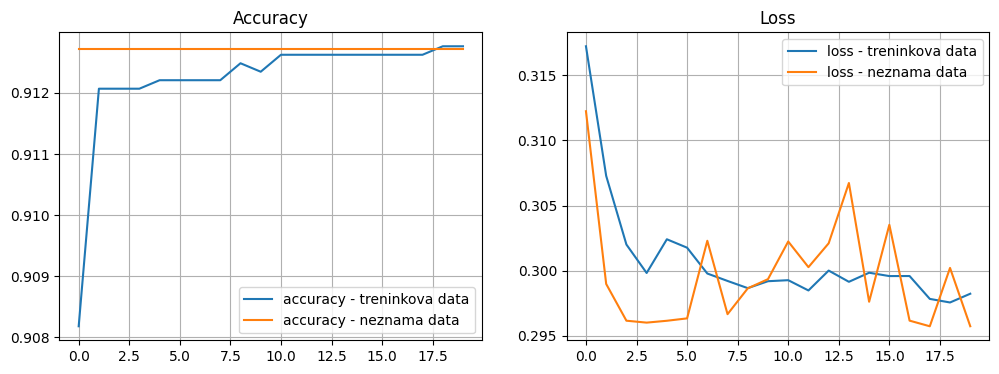

In [38]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='accuracy - treninkova data')
axis[0].plot(history.history['val_accuracy'], label='accuracy - neznama data')
axis[0].grid()
axis[0].set_title('Accuracy')
axis[0].legend()

axis[1].plot(history.history['loss'], label='loss - treninkova data')
axis[1].plot(history.history['val_loss'], label='loss - neznama data')
axis[1].grid()
axis[1].set_title('Loss')
axis[1].legend()

loss, accuracy = neural_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # pro rozdeleni  dat
from sklearn.model_selection import KFold # pouziti cross validace
from sklearn.pipeline import Pipeline

seed = 420
y = preprocessing.LabelEncoder().fit_transform(df_final['art_annotation'])
X = df_final
X = X.drop('art_annotation',axis = 1)
X = X.drop('icp_annotation',axis = 1)
X = X.drop('StartTime',axis = 1)
X = X.drop('EndTime',axis = 1)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)


pipe_mm_rf200 = Pipeline([('scaler', MinMaxScaler()),('classifier', RandomForestClassifier(n_estimators=200))])
pipe_mm_rf500 = Pipeline([('scaler', MinMaxScaler()),('classifier', RandomForestClassifier(n_estimators=500))])
pipe_mm_knn5 = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=5))])
pipe_mm_knn7 = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=7))])
pipe_mm_knn9 = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=9))])
pipe_mm_xcb = Pipeline([('scaler', MinMaxScaler()),('classifier', xgb.XGBClassifier())]) #n_estimators=500, max_depth=16) choose hyperparameters correctly?
pipe_mm_cat = Pipeline([('scaler', MinMaxScaler()),('classifier', cb.CatBoostClassifier(random_state=seed, verbose = 0))])

pipes = {"pipe_mm_XGB":pipe_mm_xcb,"pipe_mm_Cat":pipe_mm_cat,"pipe_mm_rf200":pipe_mm_rf200,"pipe_mm_rf500":pipe_mm_rf500,
"pipe_mm_knn5":pipe_mm_knn5,"pipe_mm_knn7":pipe_mm_knn7,"pipe_mm_knn9":pipe_mm_knn9}
# pro kazdou rouru si budeme drzet vysledky
results = { pipe_name: [] for pipe_name in pipes.keys()}
# rozdelime si data na trenovaci, ktere budeme delit dale, a testovaci, na kterych pak ukazeme chovani
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# trenovaci mnozinu budeme delit dale na 5 podmnozin
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X_tr, y_tr): # vraci dvojici poli testovacich a trenovacich indexu
  # rozdel si data na trenovaci a na data, na kterych bude ohodnocen klasifikator
  X_fold_tr = X_tr.values[train_index]
  y_fold_tr = y_tr[train_index]
  X_fold_test = X_tr.values[test_index]
  y_fold_test = y_tr[test_index]
  for k, pipe in pipes.items(): # pro kazdou pipe, delej
    pipe.fit(X_fold_tr, y_fold_tr) # nauc
    results[k].append(pipe.score(X_fold_test,y_fold_test)) # uloz si accuracy
    print(train_index,k)
#udelej si dataframe pro zhodnoceni
results = pd.DataFrame(data = results)
print(results) # tiskni za jednoltive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer

f1_results = {}

# Add the classification report and F1-score
for k, pipe in pipes.items():
    pipe.fit(X_tr, y_tr)
    y_pred_test = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred_test)  # You can change 'weighted' based on your requirement
    f1_results[k] = f1  # Store the F1-score
    
    print(f"Classification Report for {k}")
    print(classification_report(y_test, y_pred_test))
    print(f"F1-Score for {k}: {f1}")

# Convert F1-score results to DataFrame for better visualization
f1_results_df = pd.DataFrame(list(f1_results.items()), columns=['Pipeline', 'F1-Score'])
print(f1_results_df)

[   0    4    5 ... 6403 6405 6406] pipe_mm_XGB


KeyboardInterrupt: 